In [2]:
#Jonathan Komala 25922974
#Dale Lu 48776451


#EZ PROJECT!!!!

import numpy as np
import matplotlib.pyplot as plt
import mltools as ml




#For now, I'm just pulling stuff and visualizing dataset so we can take a direction from there.


#Data Exploration
np.random.seed(0)#set seed

#Data set is split into 12 labels
red_data = np.genfromtxt("winequality-red.csv", delimiter =';')
white_data = np.genfromtxt("winequality-white.csv", delimiter =';')



red_y = red_data[1:,-1] #target is last column
red_x = red_data[1:,0:-1] #features are other columns

white_y = white_data[1:,-1]
white_x = white_data[1:,0:-1]


print(red_y[0])

print(red_x.shape)   #1599 red wines
print(white_x.shape) #4898 white wines
print(red_y.shape)
print(white_y.shape)


5.0
(1599, 11)
(4898, 11)
(1599,)
(4898,)


RED:
Data points: 1599

Features: 11

WHITE:
Data points: 4898

Features: 11
Plotting red feature histograms


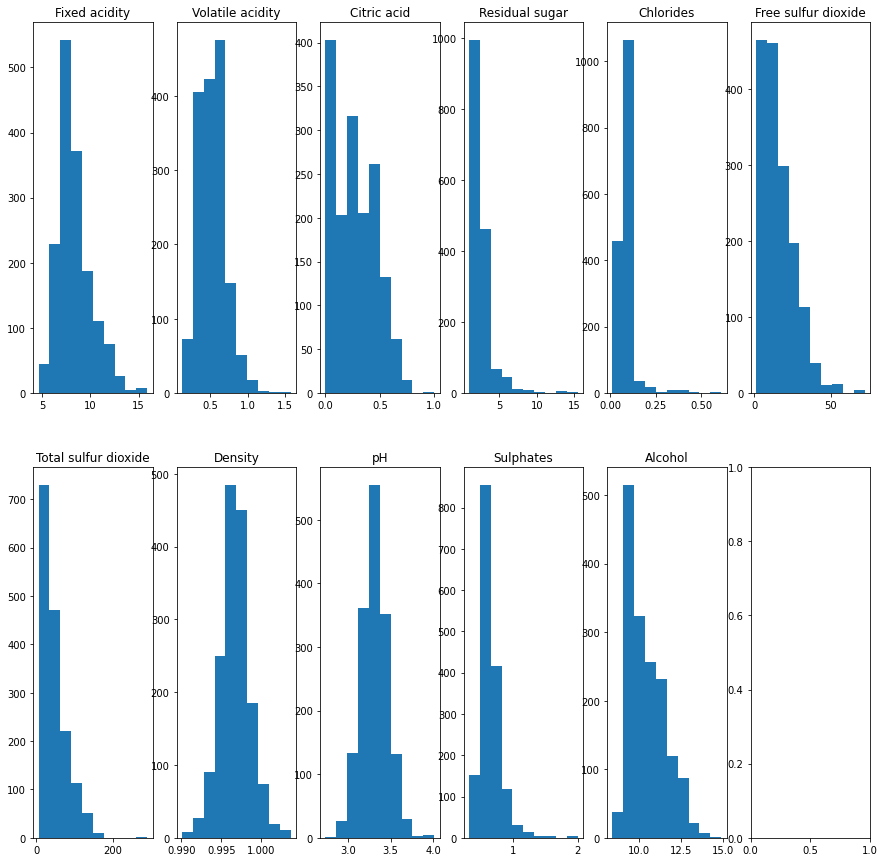

[3.51 3.2  3.26 ... 3.42 3.57 3.39]
4.01
3.31


In [3]:
#Data Points: NOT FINISHED
print("RED:\nData points:", red_x.shape[0])
print("\nFeatures:", red_x.shape[1])

print("\nWHITE:\nData points:", white_x.shape[0])
print("\nFeatures:", white_x.shape[1])


#Creating histograms: NOT FINISHED

#Create figure with 11 subplots?
fig, axs = plt.subplots(2,6, sharey=False, tight_layout = False, figsize = (15, 15))#need to change these numbers prob

#Have 11 features so might need to do it for all.

#RED
print('Plotting red feature histograms')
axs[0][0].hist(red_x[:,0])
axs[0][0].set_title("Fixed acidity")
axs[0][1].hist(red_x[:,1])
axs[0][1].set_title("Volatile acidity")
axs[0][2].hist(red_x[:,2])
axs[0][2].set_title("Citric acid")
axs[0][3].hist(red_x[:,3])
axs[0][3].set_title("Residual sugar")
axs[0][4].hist(red_x[:,4])
axs[0][4].set_title("Chlorides")
axs[0][5].hist(red_x[:,5])
axs[0][5].set_title("Free sulfur dioxide")
axs[1][0].hist(red_x[:,6])
axs[1][0].set_title("Total sulfur dioxide")
axs[1][1].hist(red_x[:,7])
axs[1][1].set_title("Density")
axs[1][2].hist(red_x[:,8])
axs[1][2].set_title("pH")
axs[1][3].hist(red_x[:,9])
axs[1][3].set_title("Sulphates")
axs[1][4].hist(red_x[:,10])
axs[1][4].set_title("Alcohol")

plt.show()
print(red_x[:,8])
print(np.amax(red_x[:,8]))
print(np.median(red_x[:,8]))

#WHITE


#Scatter plots????

In [15]:

# Split data
# Recall 1599 red. 1/5 = ~320
# 4898 white 1/5 = ~980

# Note, at some point we may want to combine red and white datasets, just keeping split for now to test on easier problem
ml.shuffleData(red_x, red_y)
ml.shuffleData(white_x, white_y)
red_valx = red_x[:320]
red_valy = red_y[:320]
white_valx = white_x[:980]
white_valy = white_y[:980]

red_trainx = red_x[321:]
red_trainy = red_y[321:]
white_trainx = white_x[981:]
white_trainy = white_y[981:]

tr_auc = np.zeros([])
val_auc = np.zeros([])

print('Data preparation complete')
print(red_valx.shape)
print(red_valy.shape)


Data preparation complete
(320, 11)
(320,)


In [17]:
# How to do feature selection?
# Originally planned to do something with entropy/information gain (remove features with particularly low IG)
# Realized our problem is regression-based, making that more complicated
# We'd need to set thresholds on the actual values, mimicking a decision tree (i.e. X1 < 4.6)

# Can we do another method of feature selection? 
# Reference: https://machinelearningmastery.com/feature-selection-for-regression-data/

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Perform regression with only one feature and calculate correlation, repeat for all features, keep the top k features
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(red_trainx, red_trainy)

# yeah it's a long variable name, sue me.
selected_red_trainx = selector.transform(red_trainx)
scores = selector.scores_

for i in range(len(scores)):
    print(f'Feature {i+1} score: {scores[i]}')
    
print(selected_red_trainx[0]) # Verifies that ordering of features is intact
print(selected_red_trainx.shape)

Feature 1 score: 8.826415045747158
Feature 2 score: 236.65472260139418
Feature 3 score: 76.46752342704329
Feature 4 score: 0.000977916487587715
Feature 5 score: 23.561201351500912
Feature 6 score: 2.7272867109225243
Feature 7 score: 29.96362372565139
Feature 8 score: 60.868825475308945
Feature 9 score: 5.007454407761838
Feature 10 score: 162.61816738651154
Feature 11 score: 398.0179552485023
[ 9.3      0.61     0.26     3.4      0.09    25.      87.       0.99975
  3.24     0.62     9.7    ]
(1278, 11)


Based on above results, let us assume that the most important features are (in descending order): 11-alcohol, 2-volatile acidity, 10-sulphates, 3-citric acid, 8-density, 7-total sulfur dioxide, 5-chlorides, 1-fixed acidity, 9-pH, 6-free sulfur dioxide,  4-residual sugar

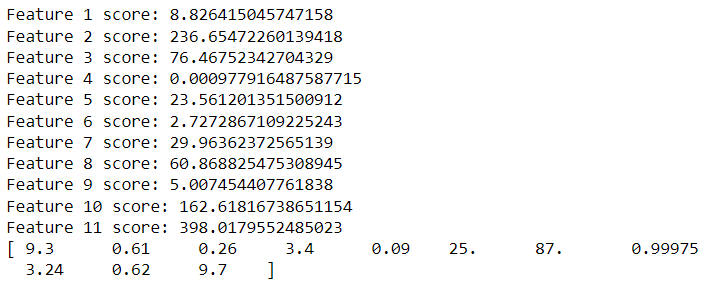

$\textit{Note: Selected a sample data points after calculating scores, matched perfectly with data point from training data.}$ $\textit{Therefore, we can assume ordering of features is not altered and thus our feature labels are accurate}$


In [18]:
# Test different layers/nodes
# mltools implementation

layers = [1, 2, 4, 6]
nodes = [5, 10, 25]    # Getting invalid value occurred in multiply/subtract errors for 1/2 layer 25 nodes (4/6 layers work?)

tr_auc = np.zeros((len(layers), len(nodes)))
va_auc = np.zeros((len(layers), len(nodes)))
for i,l in enumerate(layers):
    for j,n in enumerate(nodes):
        learner = ml.nnet.nnetRegress()
        size = [red_trainx.shape[1]]
        for val in range(l):
            size.append(n)
        size.append(1)
        
        learner.init_weights(size, 'random', red_trainx, red_trainy)
        learner.train(red_trainx, red_trainy, stopTol=1e-8, stepsize=0.25, stopIter=300)
        
        tr_auc[i,j] = learner.mse(red_trainx, red_trainy)
        va_auc[i,j] = learner.mse(red_valx, red_valy)
        
        print('Done Training/Evaluating AUC')

it 1 : J = [0.91003749]
it 2 : J = [0.8074712]
it 4 : J = [0.76460467]
it 8 : J = [0.6869369]
it 16 : J = [0.66542414]
it 32 : J = [0.63853515]
it 64 : J = [0.62522577]
it 128 : J = [0.63514062]
it 256 : J = [0.65160224]
Done Training/Evaluating AUC
it 1 : J = [0.97476409]
it 2 : J = [1.1550072]
it 4 : J = [0.78088405]
it 8 : J = [0.72653289]
it 16 : J = [0.71377241]
it 32 : J = [0.63769658]
it 64 : J = [0.62130754]
it 128 : J = [0.54978695]
it 256 : J = [0.52548189]
Done Training/Evaluating AUC


C:\Users\Siloute\Desktop\CS178\proj\mltools\nnet.py:430: RuntimeWarning: invalid value encountered in multiply
  delta = delta.dot(self.wts[l]) * arr(self.dSig(Z[l])) # propagate gradient down
C:\Users\Siloute\Desktop\CS178\proj\mltools\nnet.py:432: RuntimeWarning: invalid value encountered in subtract
  self.wts[l] -= step_i * grad    # take gradient step on current layer wts


it 1 : J = [nan]
it 2 : J = [nan]
it 4 : J = [nan]
it 8 : J = [nan]
it 16 : J = [nan]
it 32 : J = [nan]
it 64 : J = [nan]
it 128 : J = [nan]
it 256 : J = [nan]
Done Training/Evaluating AUC
it 1 : J = [0.67304854]
it 2 : J = [0.67341192]
it 4 : J = [0.67295124]
it 8 : J = [0.67189466]
it 16 : J = [0.67227069]
it 32 : J = [0.67681048]
it 64 : J = [0.68088042]
it 128 : J = [0.67639451]
it 256 : J = [0.67285085]
Done Training/Evaluating AUC
it 1 : J = [0.67304727]
it 2 : J = [0.67340635]
it 4 : J = [0.67289076]
it 8 : J = [0.67368807]
it 16 : J = [0.67166771]
it 32 : J = [0.67441715]
it 64 : J = [0.68058138]
it 128 : J = [0.67642209]
it 256 : J = [0.67285249]
Done Training/Evaluating AUC
it 1 : J = [nan]
it 2 : J = [nan]
it 4 : J = [nan]
it 8 : J = [nan]
it 16 : J = [nan]
it 32 : J = [nan]
it 64 : J = [nan]
it 128 : J = [nan]
it 256 : J = [nan]
Done Training/Evaluating AUC
it 1 : J = [0.67304744]
it 2 : J = [0.67340721]
it 4 : J = [0.67293234]
it 8 : J = [0.67187058]
it 16 : J = [0.6722755

$\textit{Results from training on layers: 1, 2, 4, 6 and nodes: 5, 10, 25}:$
it 1 : J = [0.91003749]
it 2 : J = [0.8074712]
it 4 : J = [0.76460467]
it 8 : J = [0.6869369]
it 16 : J = [0.66542414]
it 32 : J = [0.63853515]
it 64 : J = [0.62522577]
it 128 : J = [0.63514062]
it 256 : J = [0.65160224]


it 1 : J = [0.97476409]
it 2 : J = [1.1550072]
it 4 : J = [0.78088405]
it 8 : J = [0.72653289]
it 16 : J = [0.71377241]
it 32 : J = [0.63769658]
it 64 : J = [0.62130754]
it 128 : J = [0.54978695]
it 256 : J = [0.52548189]


Done Training/Evaluating AUC
C:\Users\Siloute\Desktop\CS178\proj\mltools\nnet.py:430: RuntimeWarning: invalid value encountered in multiply
  delta = delta.dot(self.wts[l]) * arr(self.dSig(Z[l])) # propagate gradient down
C:\Users\Siloute\Desktop\CS178\proj\mltools\nnet.py:432: RuntimeWarning: invalid value encountered in subtract
  self.wts[l] -= step_i * grad    # take gradient step on current layer wts


it 1 : J = [nan]
it 2 : J = [nan]
it 4 : J = [nan]
it 8 : J = [nan]
it 16 : J = [nan]
it 32 : J = [nan]
it 64 : J = [nan]
it 128 : J = [nan]
it 256 : J = [nan]


it 1 : J = [0.67304854]
it 2 : J = [0.67341192]
it 4 : J = [0.67295124]
it 8 : J = [0.67189466]
it 16 : J = [0.67227069]
it 32 : J = [0.67681048]
it 64 : J = [0.68088042]
it 128 : J = [0.67639451]
it 256 : J = [0.67285085]


it 1 : J = [0.67304727]
it 2 : J = [0.67340635]
it 4 : J = [0.67289076]
it 8 : J = [0.67368807]
it 16 : J = [0.67166771]
it 32 : J = [0.67441715]
it 64 : J = [0.68058138]
it 128 : J = [0.67642209]
it 256 : J = [0.67285249]


it 1 : J = [nan]
it 2 : J = [nan]
it 4 : J = [nan]
it 8 : J = [nan]
it 16 : J = [nan]
it 32 : J = [nan]
it 64 : J = [nan]
it 128 : J = [nan]
it 256 : J = [nan]


it 1 : J = [0.67304744]
it 2 : J = [0.67340721]
it 4 : J = [0.67293234]
it 8 : J = [0.67187058]
it 16 : J = [0.67227558]
it 32 : J = [0.67681884]
it 64 : J = [0.68088656]
it 128 : J = [0.67639399]
it 256 : J = [0.6728508]


it 1 : J = [0.67304744]
it 2 : J = [0.67340721]
it 4 : J = [0.67293234]
it 8 : J = [0.67187058]
it 16 : J = [0.67227558]
it 32 : J = [0.67681884]
it 64 : J = [0.68088656]
it 128 : J = [0.67639399]
it 256 : J = [0.6728508]


it 1 : J = [0.67304744]
it 2 : J = [0.67340721]
it 4 : J = [0.67293234]
it 8 : J = [0.67187058]
it 16 : J = [0.67227558]
it 32 : J = [0.67681884]
it 64 : J = [0.68088656]
it 128 : J = [0.67639399]
it 256 : J = [0.6728508]


it 1 : J = [0.67304744]
it 2 : J = [0.67340721]
it 4 : J = [0.67293234]
it 8 : J = [0.67187058]
it 16 : J = [0.67227558]
it 32 : J = [0.67681884]
it 64 : J = [0.68088656]
it 128 : J = [0.67639399]
it 256 : J = [0.6728508]


it 1 : J = [0.67304744]
it 2 : J = [0.67340721]
it 4 : J = [0.67293234]
it 8 : J = [0.67187058]
it 16 : J = [0.67227558]
it 32 : J = [0.67681884]
it 64 : J = [0.68088656]
it 128 : J = [0.67639399]
it 256 : J = [0.6728508]


it 1 : J = [0.67304744]
it 2 : J = [0.67340721]
it 4 : J = [0.67293234]
it 8 : J = [0.67187058]
it 16 : J = [0.67227558]
it 32 : J = [0.67681884]
it 64 : J = [0.68088656]
it 128 : J = [0.67639399]
it 256 : J = [0.6728508]
Done Training/Evaluating AUC

D:\Users\Siloute\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  
D:\Users\Siloute\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys
D:\Users\Siloute\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  
D:\Users\Siloute\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


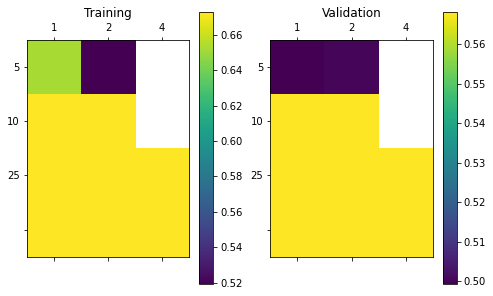

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))
cax1 = ax1.matshow(tr_auc, interpolation='nearest')
cax2 = ax2.matshow(va_auc, interpolation='nearest')
f.colorbar(cax1, ax=ax1)
f.colorbar(cax2, ax=ax2)
ax1.set_xticklabels(['']+layers)
ax1.set_yticklabels(['']+nodes)
ax2.set_xticklabels(['']+layers)
ax2.set_yticklabels(['']+nodes)
ax1.set_title('Training')
ax2.set_title('Validation')
plt.show()

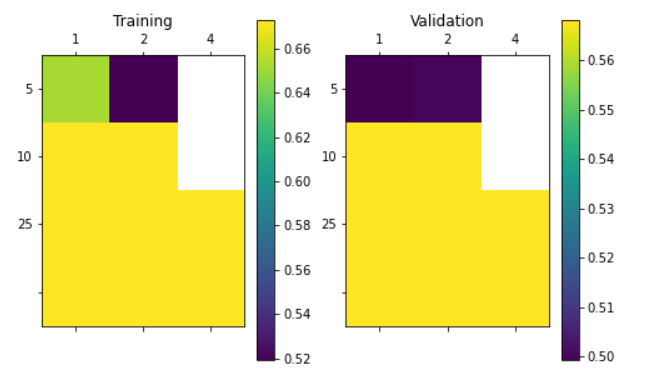

Keep in mind: The above metric is MSE, not AUC. For mean-squared error, we want to see low errors. White spaces are the result of an error generating NAN values (still not sure why)

Highest performing neural network uses either 1 or 2 layers of 5 nodes. This is likely due to the relatively simple data we're working with. 11 features is not actually that complex for a neural network to learn within a decent amount of training. 

NN used the default activation method (not sure which is default)

In [26]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(11, input_dim=red_trainx.shape[1], activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()
model.compile(loss='mse', optimizer='adam')
print('Model compiled')



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 5)                 60        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 198
Trainable params: 198
Non-trainable params: 0
_________________________________________________________________
Model compiled


Epoch 1/100
21/21 [==============================] - 0s 5ms/step - loss: 0.4818 - val_loss: 0.5520
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4762 - val_loss: 0.6043
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4739 - val_loss: 0.5557
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4753 - val_loss: 0.5591
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4705 - val_loss: 0.5563
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4713 - val_loss: 0.5451
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4729 - val_loss: 0.5640
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4697 - val_loss: 0.5437
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4669 - val_loss: 0.5470
Epoch 10/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4659 - val_loss: 0.5504
Epoch 11/

21/21 [==============================] - 0s 4ms/step - loss: 0.4428 - val_loss: 0.5151
Epoch 84/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4422 - val_loss: 0.4961
Epoch 85/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4407 - val_loss: 0.5216
Epoch 86/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4428 - val_loss: 0.4771
Epoch 87/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4419 - val_loss: 0.4797
Epoch 88/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4353 - val_loss: 0.4970
Epoch 89/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4376 - val_loss: 0.5015
Epoch 90/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4345 - val_loss: 0.4776
Epoch 91/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4463 - val_loss: 0.5207
Epoch 92/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4386 - val_loss: 0.5129
Epoch 93/100


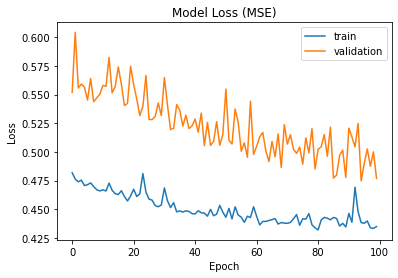

In [28]:
history = model.fit(red_trainx, red_trainy, epochs=100, batch_size=50, validation_split=0.2)

plt.clf()
plt.cla()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.show()